# Micro Credit Card Defaulter 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Harshitha\Desktop\FlipRobo Internship\Micro Credit Project\Data File.csv")

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#Since from the data I have seen that their is no use of column unnamed so I am droping it.
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
df.shape

(209593, 36)

In [7]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
#frequency of object features
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

47819I90840    7
04581I85330    7
71742I90843    6
30080I90588    6
42825I88688    6
              ..
37760I89231    1
20327I70782    1
64351I90586    1
83713I84450    1
33972I88650    1
Name: msisdn, Length: 186243, dtype: int64

UPW    209593
Name: pcircle, dtype: int64

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64



OBSERVATION:

1)msisdn happens to be cellphone number,but there is I in the 6th place.Usually a mobile number consists of 10 digits.
   by including I it will be 11 digits.so deleting I.

2)Deleting pcircle column as it has single value.

3)We can notice the data belong to  year-2016 ,will be adding the month and date columns.

In [10]:
#I have change the date columns into the interger
df['pdate'].str.replace("-","").astype(int)

0         20160720
1         20160810
2         20160819
3         20160606
4         20160622
            ...   
209588    20160617
209589    20160612
209590    20160729
209591    20160725
209592    20160707
Name: pdate, Length: 209593, dtype: int32

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'])
df['pcircle']=le.fit_transform(df['pcircle'])
df['pdate']=le.fit_transform(df['pdate'])


In [12]:
#Since I try for the date dataype into int but it was still object time so i apply the label encoder in that aslo 
# from the below i get to know that all the datatype are now in float or in the int datatype
df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [13]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

<AxesSubplot:>

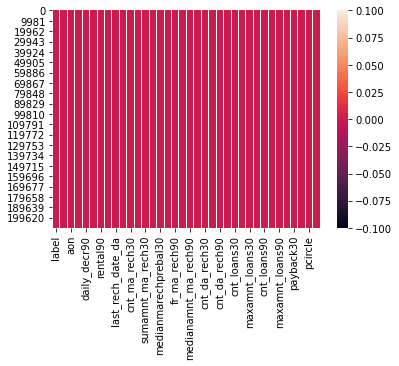

In [15]:
sns.heatmap(df.isnull())

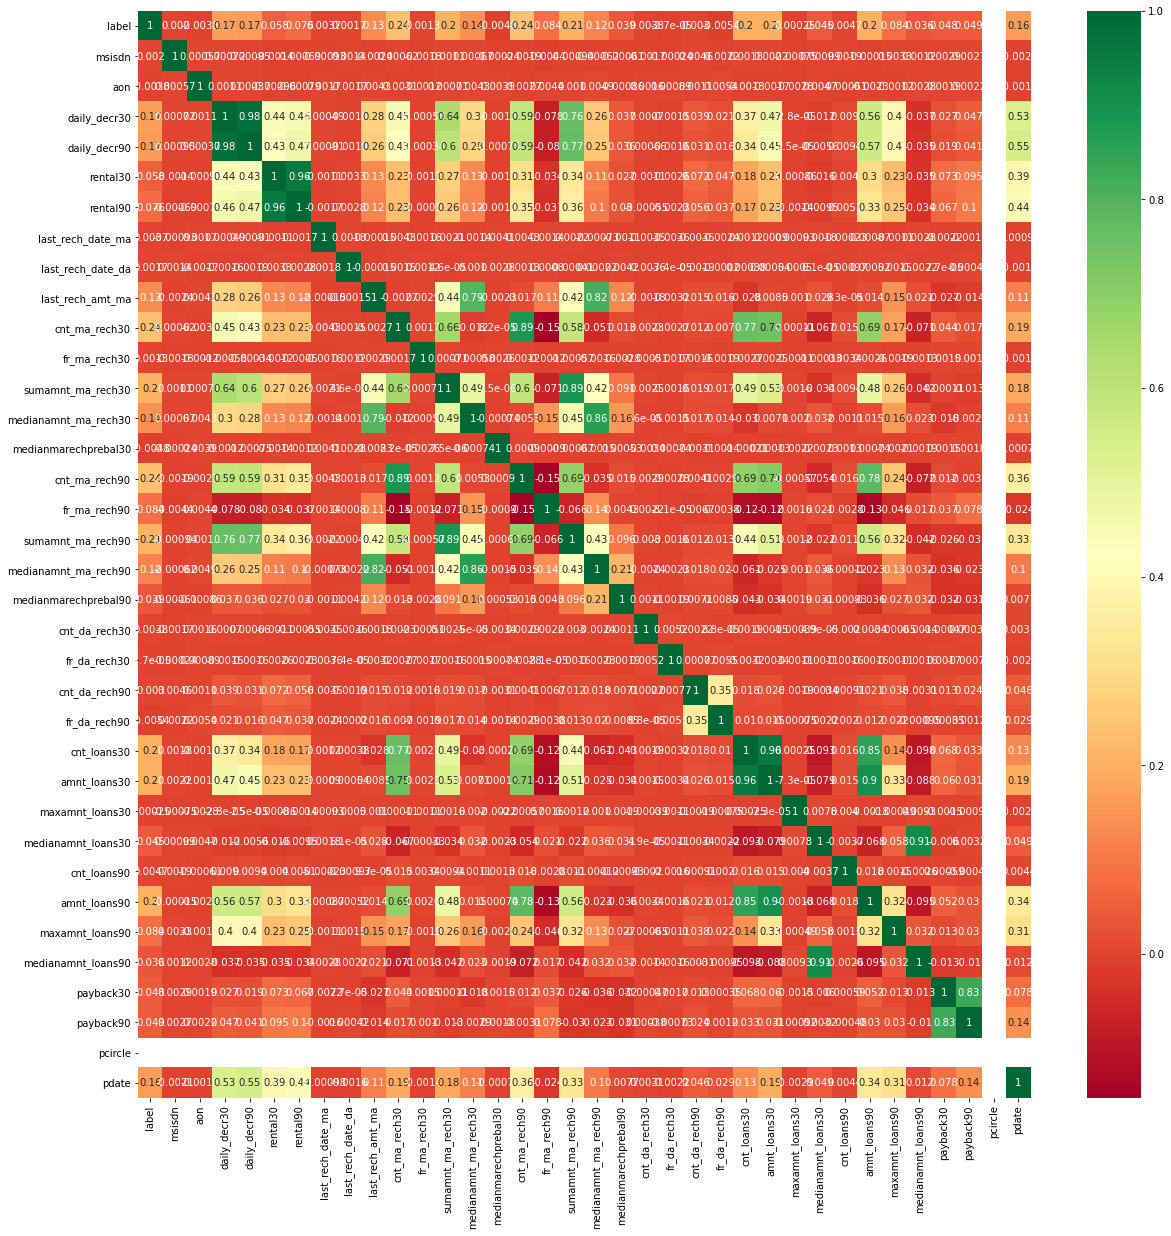

In [16]:
#get correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#Since NaN value is showing in pcircle so I am droping that column.
df.drop(['pcircle'], axis = 1, inplace = True)

<AxesSubplot:>

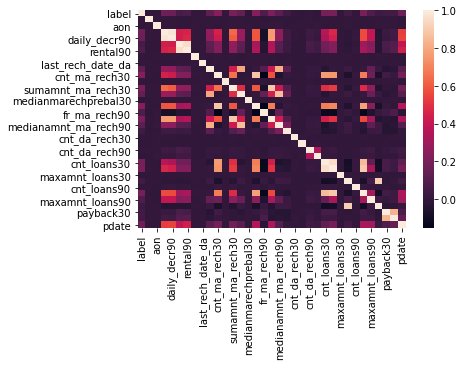

In [18]:
dfcorr=df.corr()
sns.heatmap(dfcorr)

In [19]:
#The data is very less correlated because from the graph their is very less lighter color is showing among the columns.

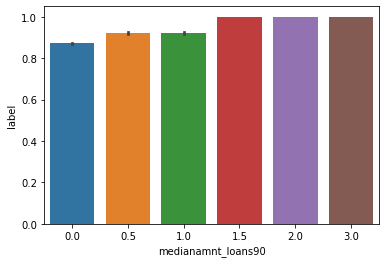

In [20]:
sns.barplot(x='medianamnt_loans90',y='label',data=df)
plt.show()

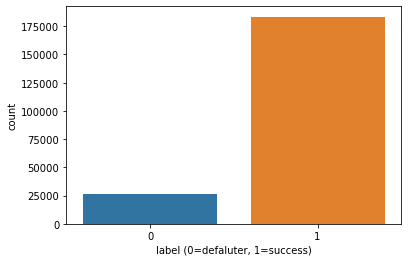

In [21]:
sns.countplot(x='label',data=df)
plt.xlabel('label (0=defaluter, 1=success)')
plt.show()

In [1]:
# pay back credit amount of successor are 175000 and failure to payback credit amount are 250000

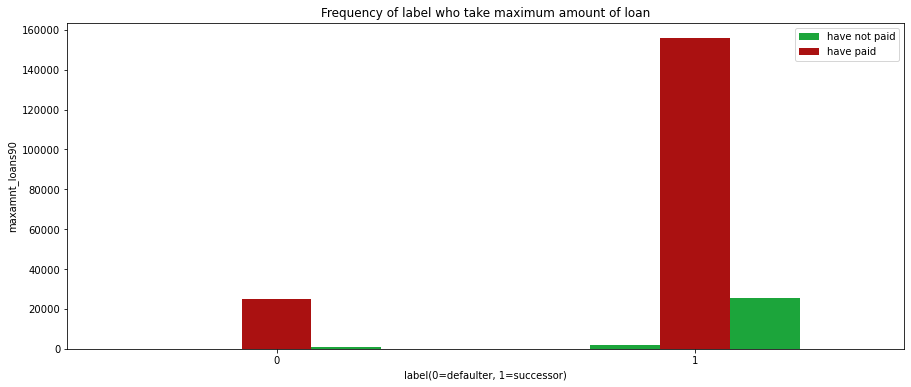

In [23]:
pd.crosstab(df.label,df.maxamnt_loans90).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Frequency of label who take maximum amount of loan')
plt.xlabel('label(0=defaulter, 1=successor)')
plt.xticks(rotation=0)
plt.legend(['have not paid', 'have paid'])
plt.ylabel('maxamnt_loans90')
plt.show()
#maxamnt_loans90

In [24]:
#Maximum amount of loan taken by the user in last 90 days and who have paid is the successor which range is high as compare to the person who have not paid called as defaulter

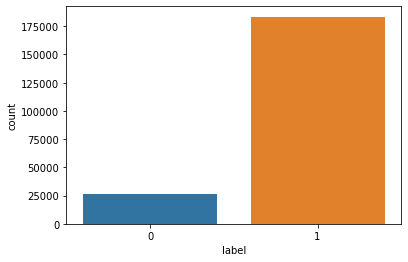

In [25]:
sns.countplot(x="label",data=df)
plt.show()
#the users that didn't paid back the credit amount within 5 days is around 1/8 th of the total people who took loan.

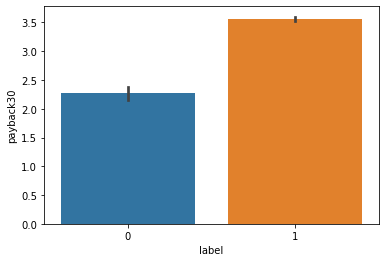

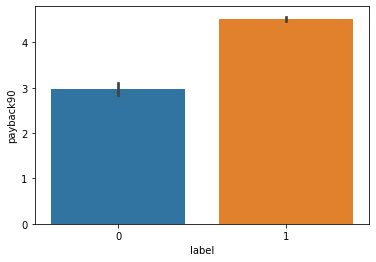

In [26]:
sns.barplot(y="payback30",x="label",data=df)
plt.show()
sns.barplot(y="payback90",x="label",data=df)
plt.show()
# average loan payback time is 3-4 days.

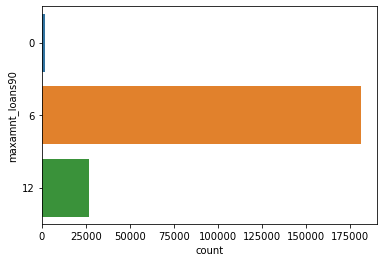

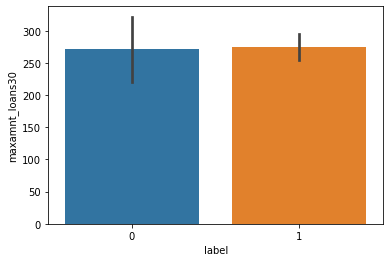

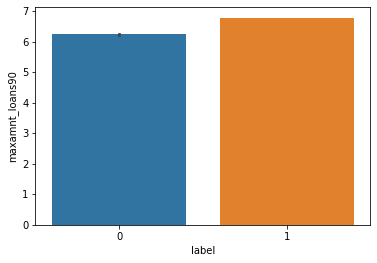

In [27]:
sns.countplot(y="maxamnt_loans90",data=df)
plt.show()
sns.barplot(y="maxamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="maxamnt_loans90",x="label",data=df)
plt.show()
#maximum amount of loan taken by each user in 90 days is 5 Rs for which they had to pay 6 Rs.
#we also see outliers present in maximum amount loan taken in 30 days. And 50% users took loan in 30 days.

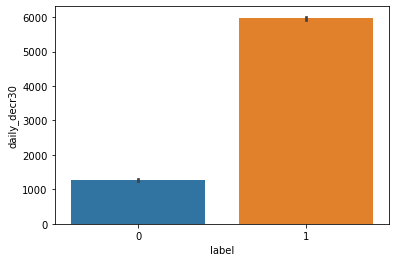

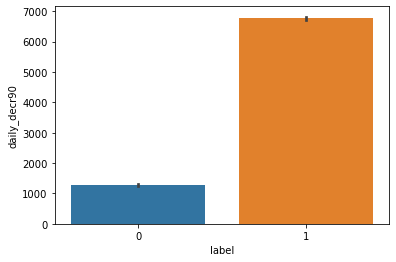

In [28]:
sns.barplot(y="daily_decr30",x="label",data=df)
plt.show()
sns.barplot(y="daily_decr90",x="label",data=df)
plt.show()
#non defaulters spent 6 times higher daily amount from main account within 30 days
#non defaulters spent 7 times higher daily amount from main account within 90 days

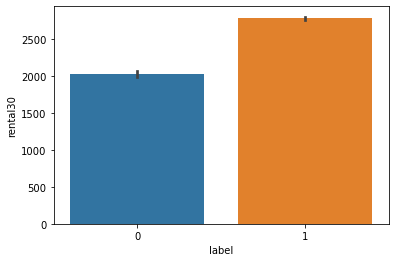

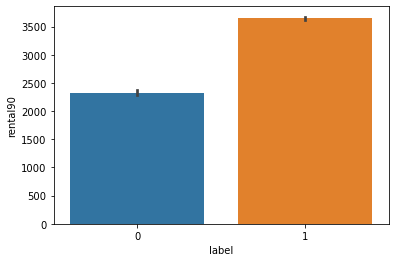

In [29]:
sns.barplot(y="rental30",x="label",data=df)
plt.show()
sns.barplot(y="rental90",x="label",data=df)
plt.show()
#Average main account balance is high for non defaulters

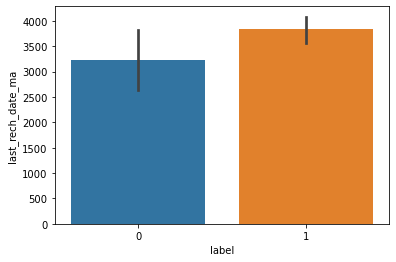

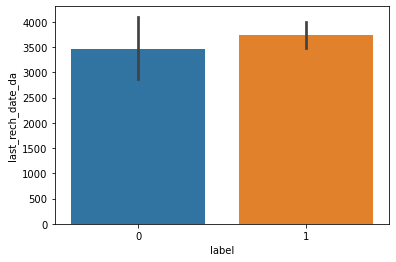

In [30]:
sns.barplot(y="last_rech_date_ma",x="label",data=df)
plt.show()
sns.barplot(y="last_rech_date_da",x="label",data=df)
plt.show()
#Number of days till last recharge of main account & data account is higher for non defaulters.
#outliers are present.


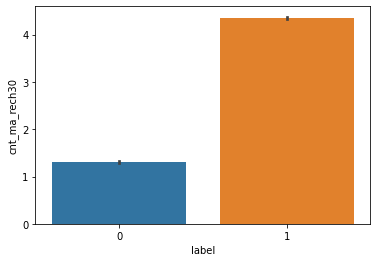

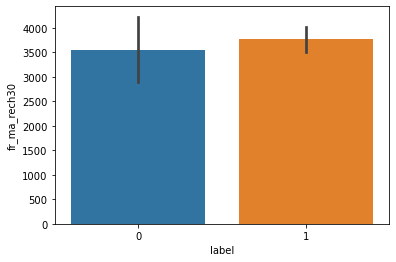

In [31]:
sns.barplot(y="cnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_ma_rech30",x="label",data=df)
plt.show()
#Number of times main account got recharged is higher for non defaulters in last 30 days.
#Frequency of main account recharged in last 30 days is slight higher for non defaulter and significant amount of outliers are present.

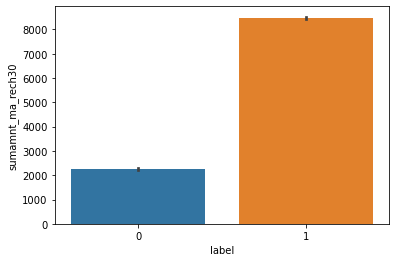

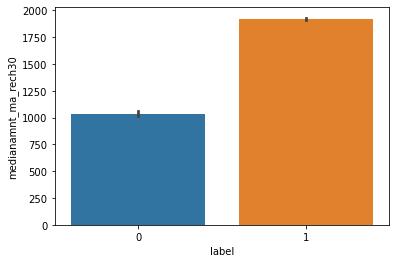

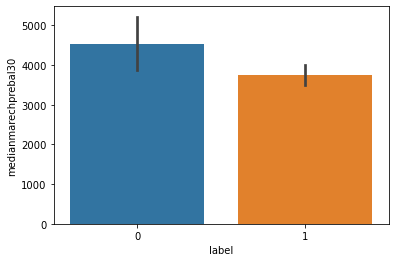

In [32]:
sns.barplot(y="sumamnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="medianamnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="medianmarechprebal30",x="label",data=df)
plt.show()
#Total amount of recharge in main account over last 30 days is higher for non defaulters
#Median of main account balance just before recharge in last 30 is higher for non defaulters.
#we also see outliers present in Median of main account balance just before recharge.

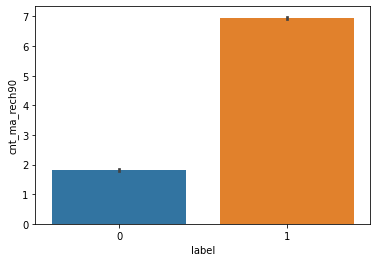

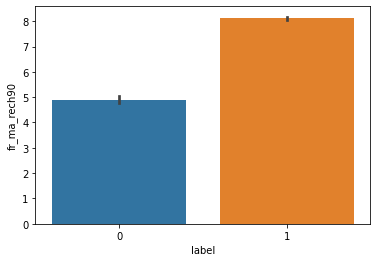

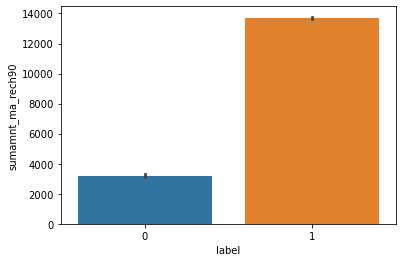

In [33]:
sns.barplot(y="cnt_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="fr_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="sumamnt_ma_rech90",x="label",data=df)
plt.show()
#Number of times main account got recharged is higher for non defaulters in last 90 days.
#Frequency of main account recharged in last 90 days is slight higher for non defaulter.
#Total amount of recharge in main account over last 90 days is higher for non defaulters.

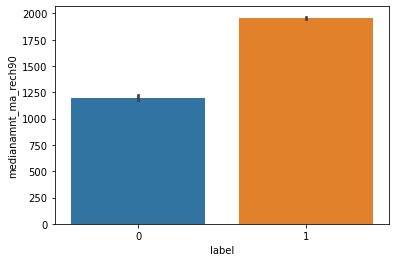

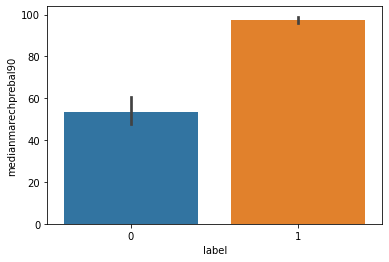

In [34]:
sns.barplot(y="medianamnt_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="medianmarechprebal90",x="label",data=df)
plt.show()
#Median of main account balance just before recharge in last 90 is higher for non defaulters.
#we also see outliers present in Median of main account balance just before recharge.

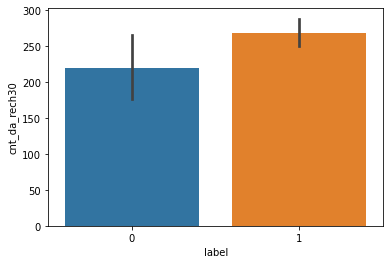

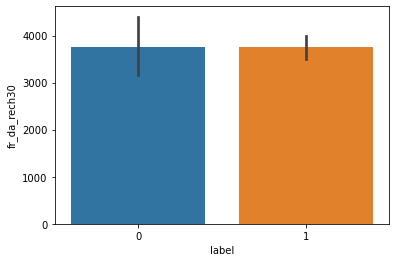

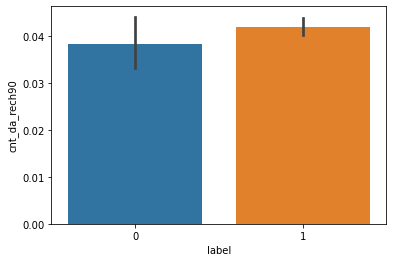

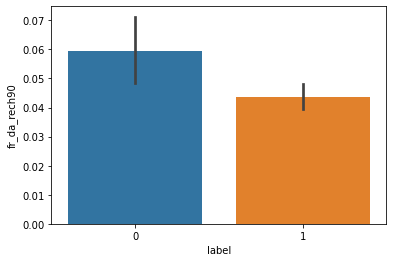

In [35]:
sns.barplot(y="cnt_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_da_rech90",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech90",x="label",data=df)
plt.show()
#non defaulters recharged the data account more than defaulters in last 30 days.
#Frequency of data account recharged is almost same defaulters and non defaulters in last 30 days
#non defaulters recharged the data account more than defaulters in last 90 days.
#outliers are present

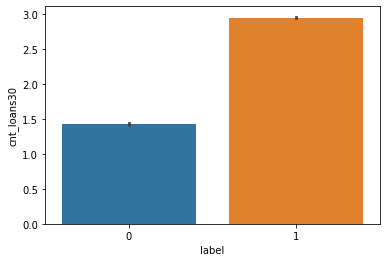

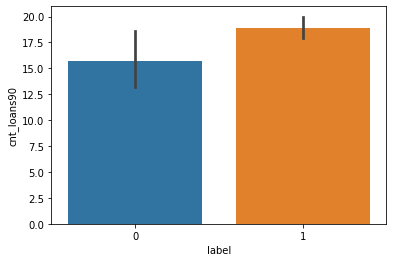

In [36]:
sns.barplot(y="cnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_loans90",x="label",data=df)
plt.show()
#Number of loans taken by user in last 30 & 90 days is higher for non defaulters.
#outliers are present in Number of loans taken by user in last 90 days

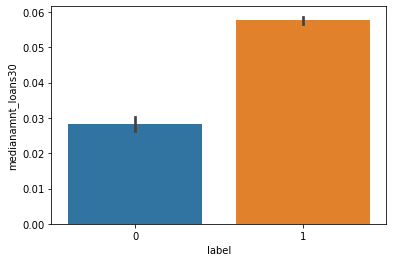

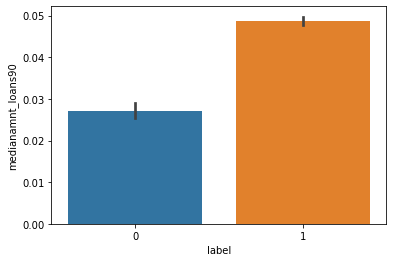

In [37]:
sns.barplot(y="medianamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="medianamnt_loans90",x="label",data=df)
plt.show()
#Median of amounts of loan taken by the user in last 30 & 90 days is higher for non defaulters with outliers present.

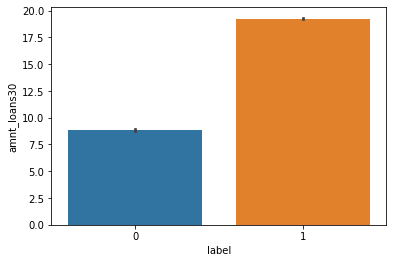

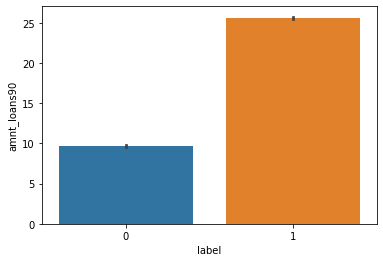

In [38]:
sns.barplot(y="amnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="amnt_loans90",x="label",data=df)
plt.show()
#Total amount of loans taken by user in last 30 & 90 days is higher for non defaulter.


<AxesSubplot:>

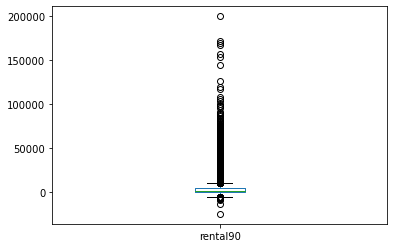

In [39]:
df['rental90'].plot.box()

In [40]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [41]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)

(209593, 35)


In [42]:
threshold=3
print(np.where(zscore>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [43]:
df_new=df[(zscore<3).all(axis=1)]

In [44]:

df.shape

(209593, 35)

In [45]:
df_new.shape

(161465, 35)

In [46]:
#from the above the 48128 outliers are get removed

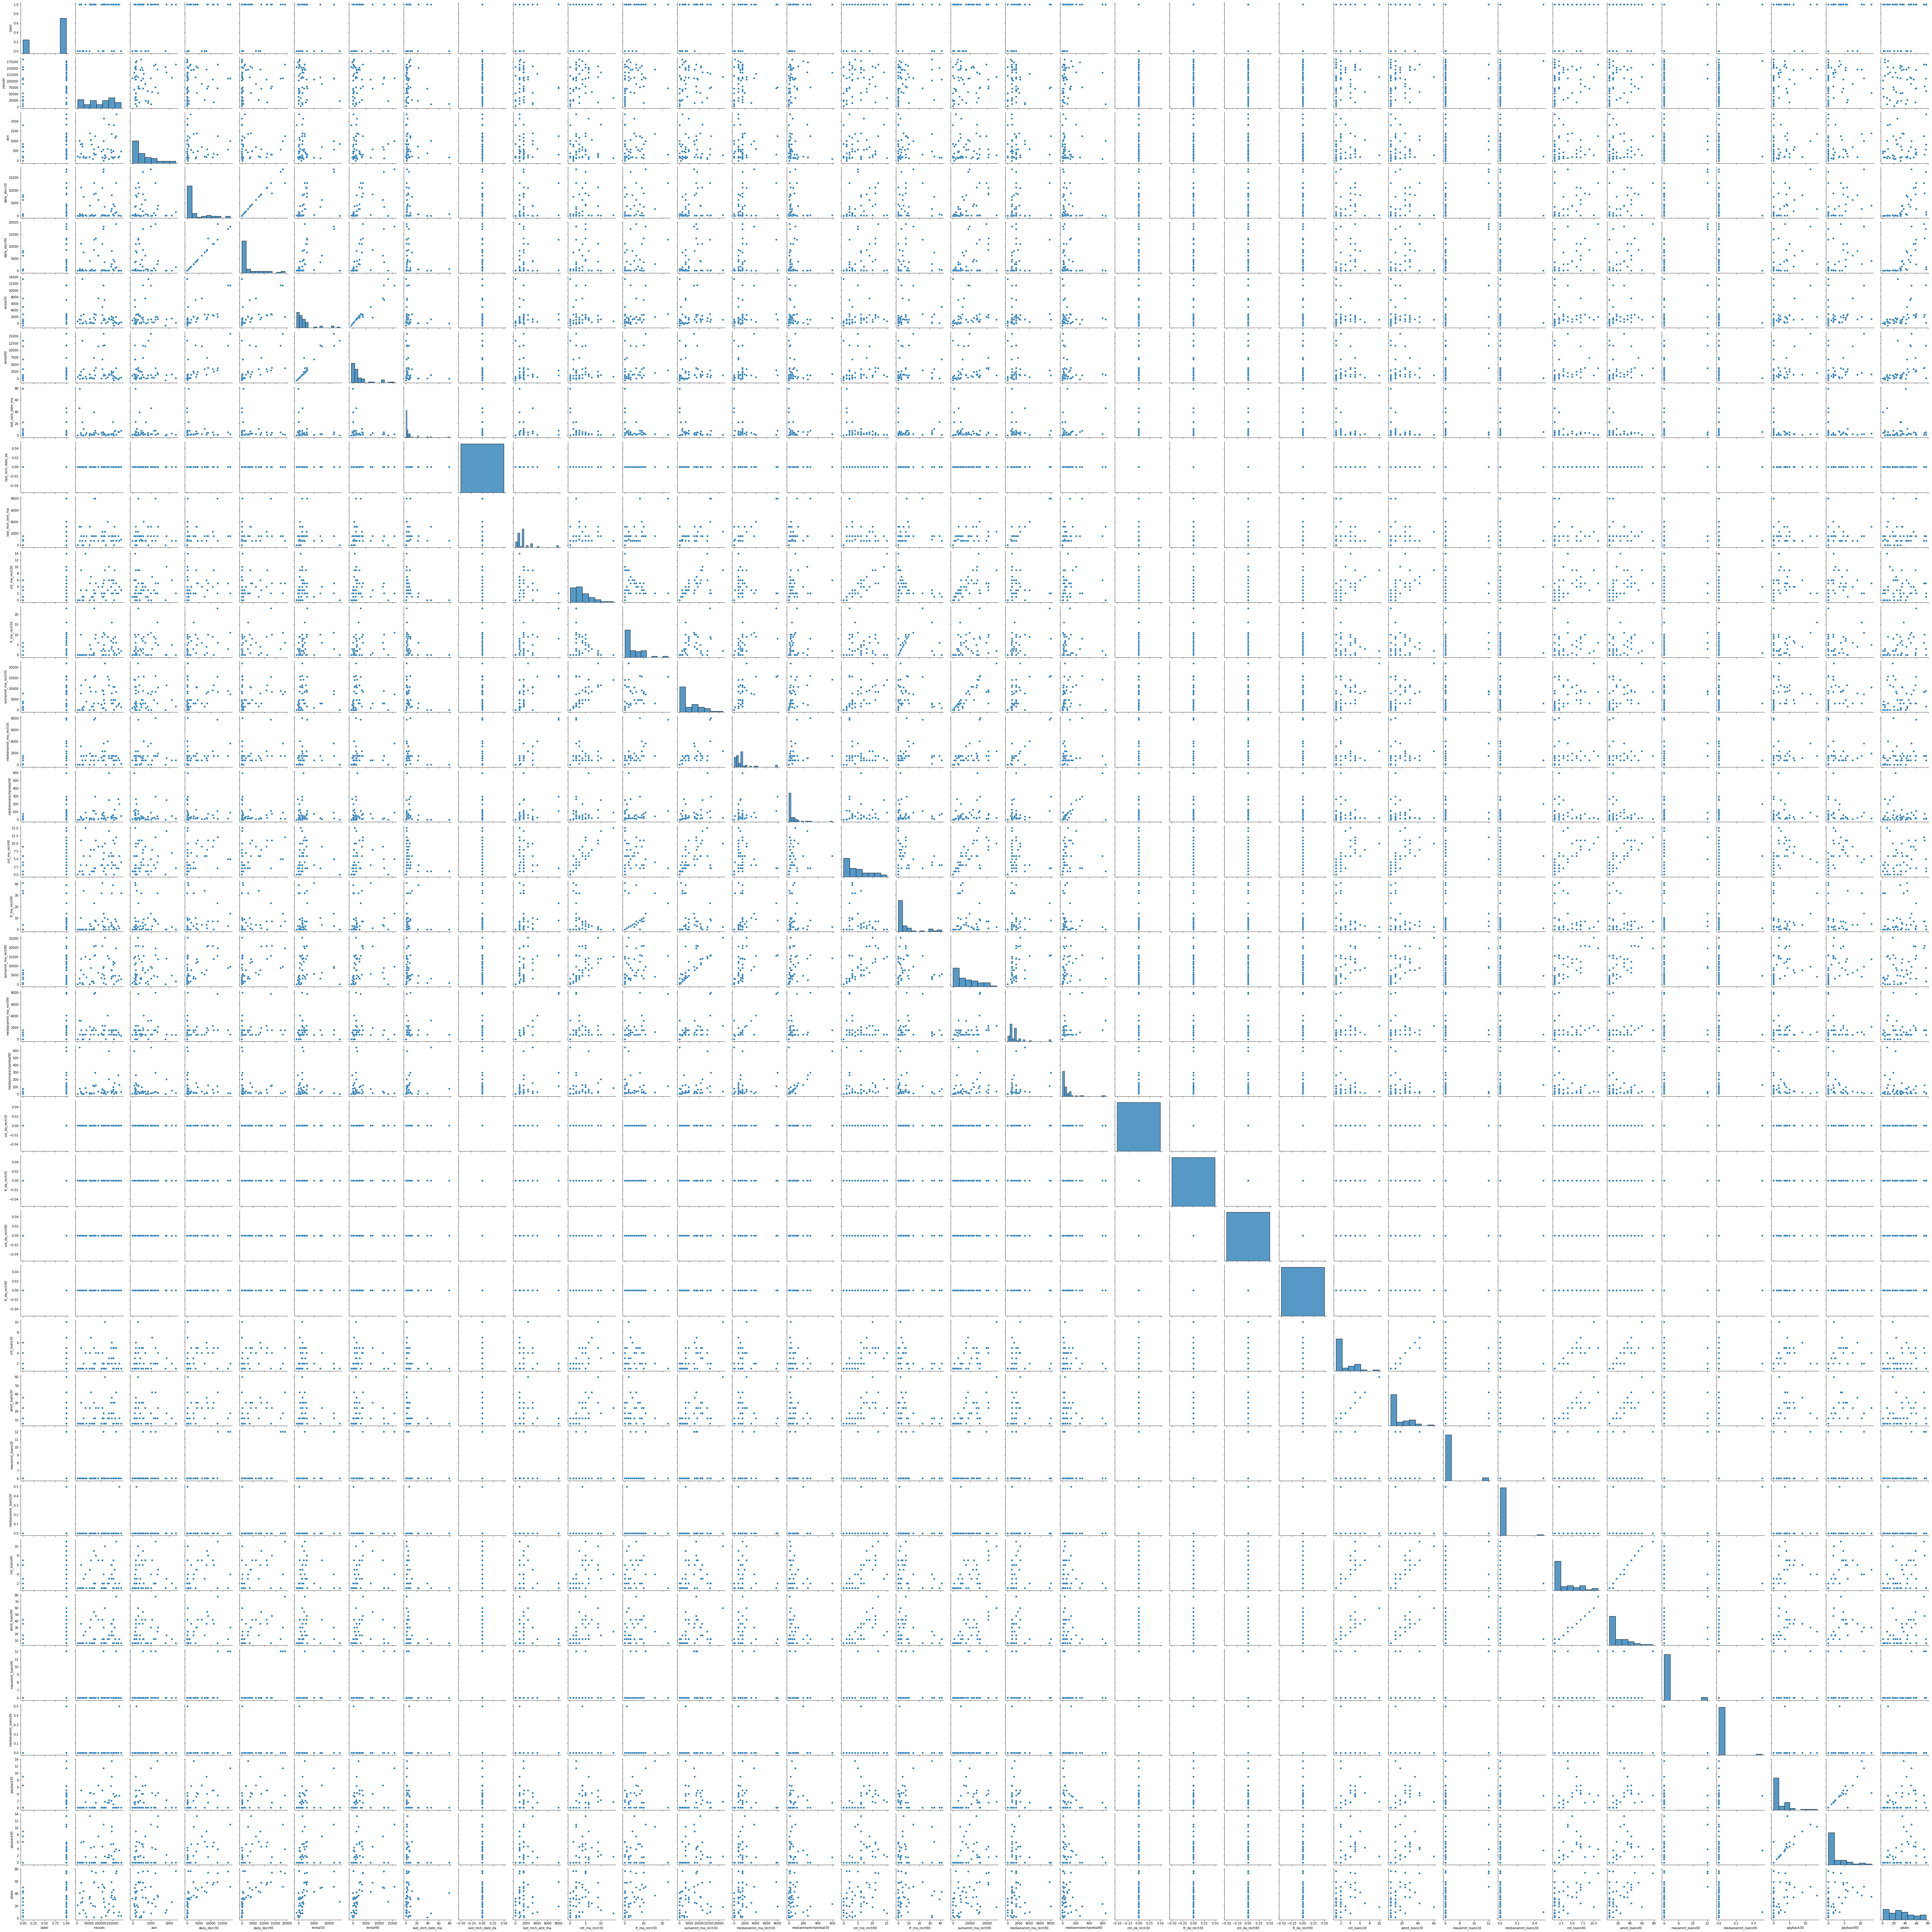

In [47]:
sns.pairplot(df_new.sample(50))

In [48]:
from sklearn.decomposition import PCA

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [50]:
x.shape

(161465, 35)

In [51]:
pca=PCA(n_components=10)

In [52]:
x=pca.fit_transform(x)

In [53]:
y=df_new.iloc[:,0].values

In [54]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)

In [83]:
print(x_train.shape,x_test.shape)

(113025, 10) (48440, 10)


In [84]:
print(y_train.shape,y_test.shape)

(113025,) (48440,)


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [86]:
KNN=KNeighborsClassifier(n_neighbors=6)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [87]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

******************* KNeighborsClassifier *******************


KNeighborsClassifier(n_neighbors=6)


Accuracy_Score =  0.9676300578034682


Cross_Val_Score =  0.9690459343589148


roc_auc_score =  0.8967536553211889


Classification_report
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6720
           1       0.97      0.99      0.98     41720

    accuracy                           0.97     48440
   macro avg       0.96      0.90      0.93     48440
weighted avg       0.97      0.97      0.97     48440



[[ 5367  1353]
 [  215 41505]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* LogisticRegression *******************


LogisticRegression()


Accuracy_Score =  0.9403179190751445


Cross_Val_Score =  0.9401170587356742


roc_auc_score =  0.8275911832853947


Classification_report
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      6720
           1      

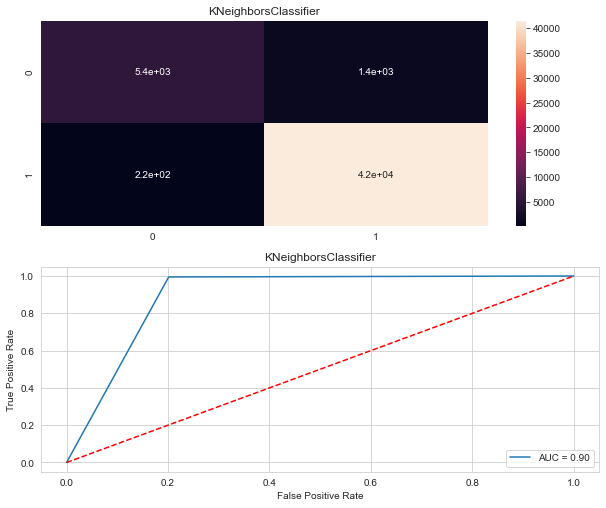

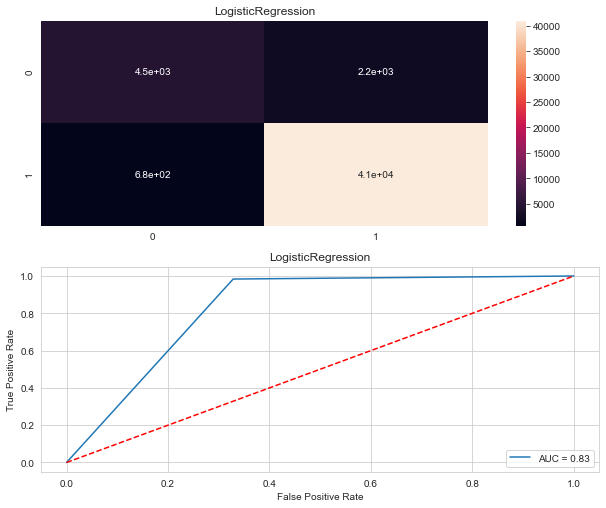

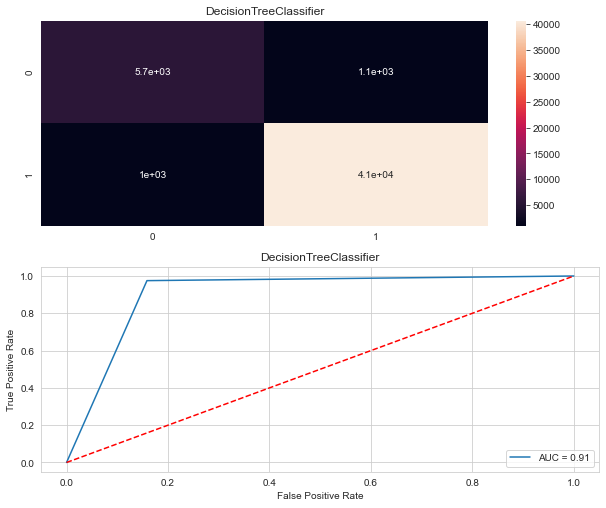

In [89]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*******************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')  
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [90]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0    KNeighborsClassifier       96.763006        96.904593      89.675366
1      LogisticRegression       94.031792        94.011706      82.759118
2  DecisionTreeClassifier       95.656482        95.776174      90.830687
3              GaussianNB       82.947977        83.213085      80.238295

Since from the above table, it's clear that KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier and GaussianNB all are performing very well.

KNeighborsClassifier is being chosen as the final model because it perform well on the dataset Accuracy_score = 96.75 Cross_val_score = 96.90 Roc_auc_curve = 89.63

In [96]:
parameters={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']
}

In [101]:
import joblib
#save the model as a pickel in a file

In [102]:
joblib.dump(KNN,'Micro-Credit Defaulter Model.pkl')

['Micro-Credit Defaulter Model.pkl']